In [1]:
from tracker.iou import iou
from tracker.concat_trackers import *
from tracker.find_worms import *
import os 

warnings.simplefilter(action='ignore', category=FutureWarning)

- `p2tracker` 为具体到盘子文件夹的路径

In [7]:
# 写到具体的文件夹名
p2tracker = "./simple_trackers_result/n2_3_30_6_11.04" 
analysis_folder = os.path.split(p2tracker)[-1]

p2trackers = os.listdir("./simple_trackers_result/")
analysis_folder = p2trackers[0]
print("分析文件夹：", analysis_folder)

分析文件夹： n2_3_20_14_11.05


# Part I load subjects and obtain finer trackers

<Axes: xlabel='frame'>

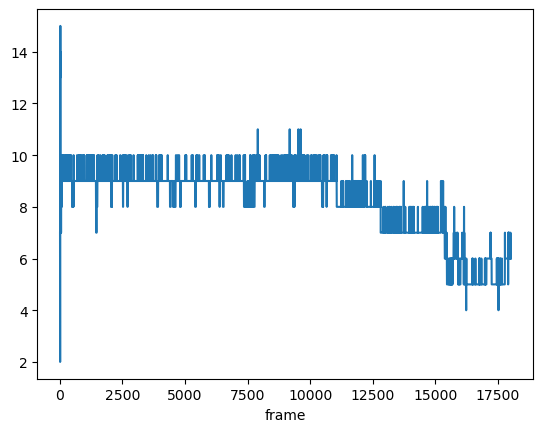

In [8]:
all_trackers, long_dfs, centroid = load_subj('simple_trackers_result', analysis_folder) # load the Petri dish tracker results
new_trackers, new_summarize = trackers2fine(all_trackers, long_dfs)     # convert the trackers to finer trackers
long_dfs.groupby('frame').size().plot() # visualize the number of worms per frame

# PART II Find initial worms
- `find_initial(long_dfs, *, new_summarize)`: **此处的 \* 为盘中虫子数，取决于上面的图像最高点**

In [11]:
all_ini = find_initial(long_dfs, 10, new_summarize)
ini_indx = all_ini.sort_values(by='start_frame').tracker_id.values
print(len(ini_indx))

10


# PART III Find & Diagnosis & Save worms

In [12]:
# find worms based on the initial indices and summarized dataframe
worms = find_worms(ini_indx, new_summarize)
valid_worms = diagnosis_worms_square(worms, new_summarize, centroid, long_dfs, 870, start_frame=600)
print("================= Valid Worms ================")
print(f"Number of valid worms: {len(valid_worms)}")

$[37] all path banned
worm 3 end frame < max frame
worm 5 start frame > 600
worm 6 end frame < max frame
worm 9 start frame > 600
================= Valid Worms ================
Number of valid worms: 6


In [15]:
write_results(analysis_folder, valid_worms, new_trackers, centroid, 900, shape='square')